In [89]:
import pandas as pd
import numpy as np
signals= pd.read_csv('csv/bidmc_01_Signals.csv',index_col=0)
signals['sec'] = signals['Time [s]'].apply(lambda x: int(np.floor(x)))
numerics = pd.read_csv('csv/bidmc_01_Numerics.csv',index_col=0)
numerics.rename(columns={'Time [s]':'sec'},inplace=True)
numerics.drop(' RESP',axis=1,inplace=True)
numerics['sec'] = numerics['sec'].apply(lambda x: int(x))
person = signals.merge(numerics,on='sec',how='outer')
person.head()

,Time [s],RESP,PLETH,V,AVR,II,sec,HR,PULSE,SpO2
0,0.000,0.35386,0.43597,0.52549,0.30392,0.72549,0,94,93.0,97.0
1,0.008,0.35679,0.43206,0.51961,0.33529,0.67059,0,94,93.0,97.0
2,0.016,0.35875,0.42815,0.51569,0.37451,0.60980,0,94,93.0,97.0
3,0.024,0.36168,0.42424,0.50588,0.41961,0.55098,0,94,93.0,97.0
4,0.032,0.36364,0.42131,0.50980,0.44902,0.50000,0,94,93.0,97.0


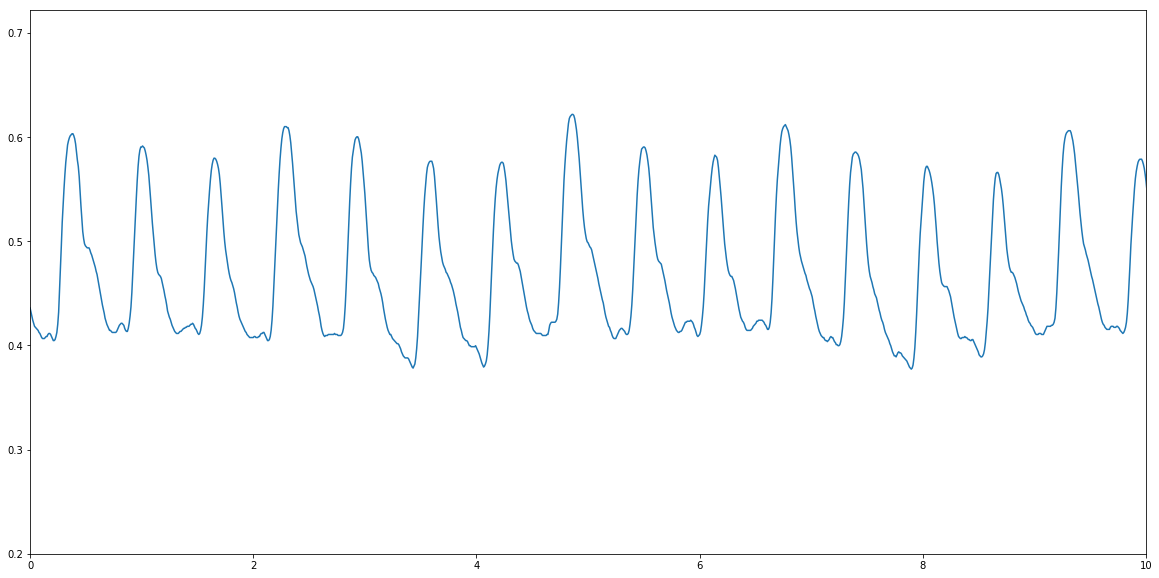

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(df2['Time [s]'],df2[df2.columns[2]])
plt.xlim(0,10)
plt.show()

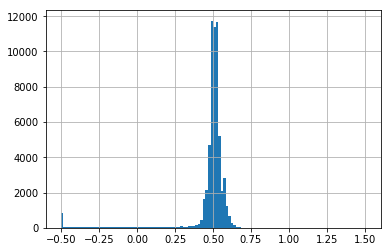

In [40]:
df2[df2.columns[3]].hist(bins=120)